In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 600

os.chdir("C:/Users/Admin/Documents/scripts/gpea/stats")

offset = 24
waterings = [94, 191, 263, 335, 359, 461, 526, 575, 670, 720, 767, 839, 886, 913]

def statPlot(data, title, waterings=None, offset=0):
    interpolatedData = data.interpolate()
    interpolatedData =  interpolatedData.values.tolist()
    interpolatedData = [i[0] for i in interpolatedData]

    data = data.values.tolist()
    data = [i[0] for i in data]

    onlyInterpolatedData = []
    for i in range(0, len(data)):
        if interpolatedData[i] == data[i]:
            onlyInterpolatedData.append(None)
        else:
            onlyInterpolatedData.append(interpolatedData[i])

    plt.plot(interpolatedData, color="blue", label="Recorded data")
    plt.plot(onlyInterpolatedData, color="red", label="Interpolated data")
    plt.title(title)
    plt.ylabel("Pixels")
    plt.xlabel("Time (hours)")
    plt.axhline(0, color='black')
    if waterings is not None:
        labeled = False
        for line in waterings:
            if line > offset:
                if not labeled:
                    plt.axvline(line - offset, color="green", label="Waterings")
                    labeled = True
                else:
                    plt.axvline(line - offset, color="green")

    x = np.arange(len(data))
    y = interpolatedData
    correlationMatrix = np.corrcoef(x, y)
    rSquared = correlationMatrix[0, 1]**2

    x = x.reshape((-1, 1))
    model = LinearRegression()
    model.fit(x, y)

    axes = plt.gca()
    xValues = np.array(axes.get_xlim())
    yValues = model.intercept_ + model.coef_[0] * xValues
    # plt.plot(xValues, yValues, color="purple", label="Linear regression\nR^2 = " + str(rSquared)[:8])

    plt.axvline(0, color='black')

    plt.legend(loc='best')

    return rSquared

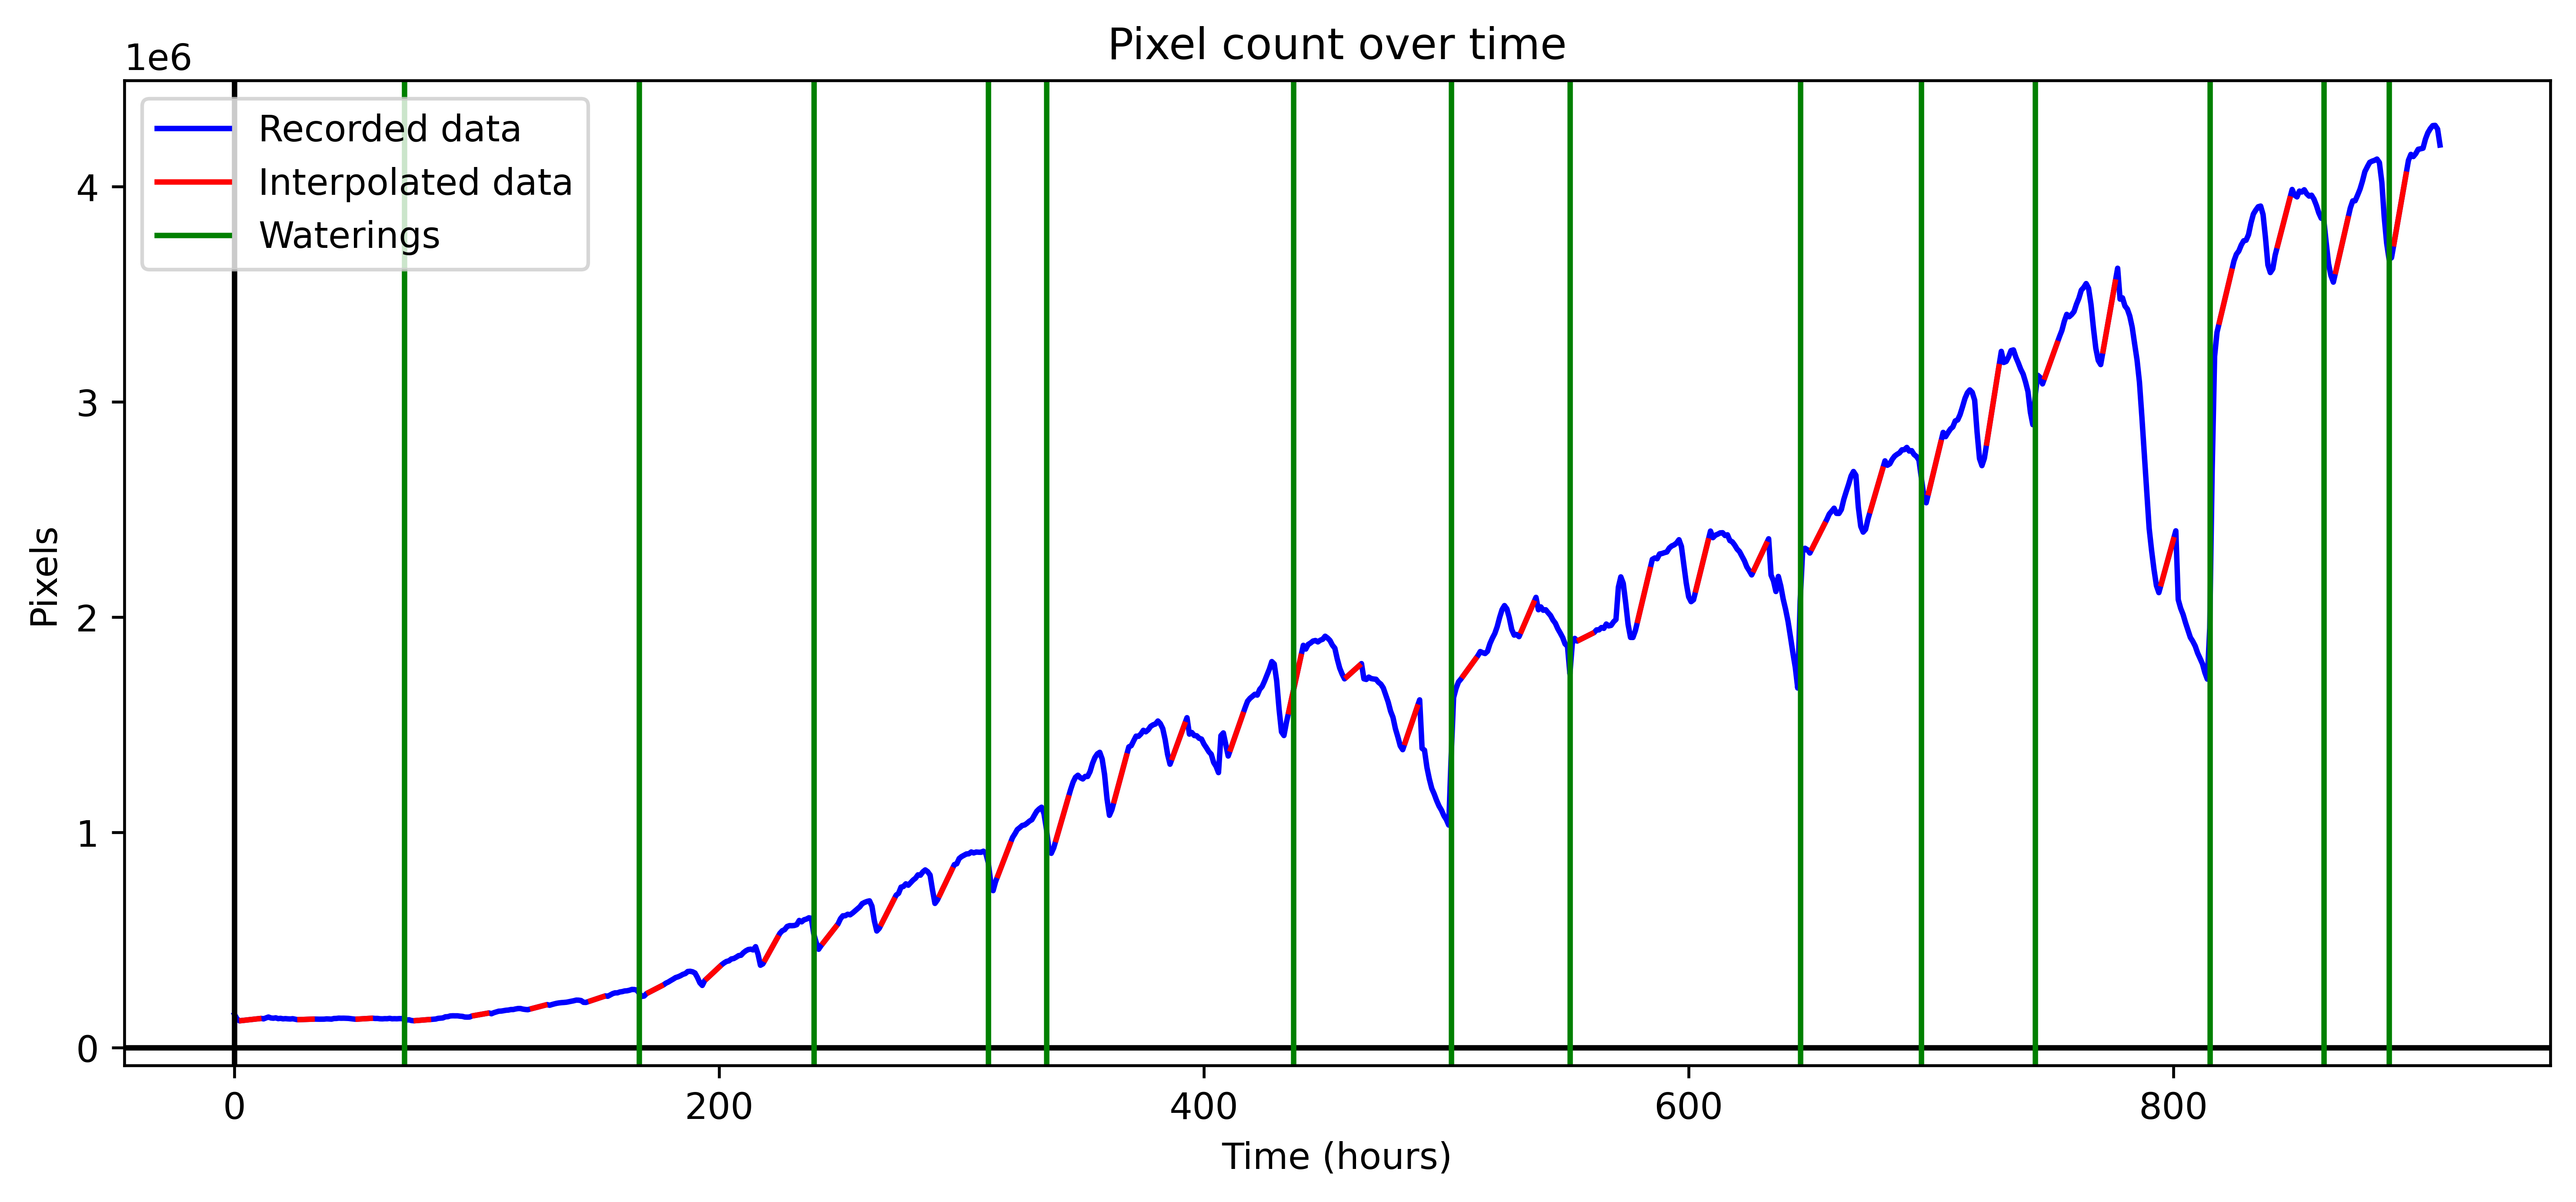

In [4]:
baseData = pd.read_csv("./data.csv",delimiter=",", header=0)[offset:]['InterestingPixels']
baseData = pd.DataFrame([f if f != 0 else None for f in baseData])
baseRSquared = statPlot(baseData, "Pixel count over time", waterings, offset)